# Assignment 2

In this assigment, we will work with the *Adult* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/2/adult). Extract the data files into the subdirectory: `../05_src/data/adult/` (relative to `./05_src/`).

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../05_src/data/adult/`, then you can use the code below to load them.

In [ ]:
import pandas as pd
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
    'native-country', 'income'
]
adult_dt = (pd.read_csv('../05_src/data/adult/adult.data', header = None, names = columns)
              .assign(income = lambda x: (x.income.str.strip() == '>50K')*1))

# Get X and Y

Create the features data frame and target data:

+ Create a dataframe `X` that holds the features (all columns that are not `income`).
+ Create a dataframe `Y` that holds the target data (`income`).
+ From `X` and `Y`, obtain the training and testing data sets:

    - Use a train-test split of 70-30%. 
    - Set the random state of the splitting function to 42.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'adult_dt' is the dataframe loaded with the income data

# Creating X and Y
y = adult_dt['income']
x = adult_dt.drop(columns=['income'])

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Displaying the shapes of the training and testing sets
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)


In [ ]:
output: X_train shape: (22792, 14)
X_test shape: (9769, 14)
Y_train shape: (22792,)
Y_test shape: (9769,)


## Random States

Please comment: 

+ What is the [random state](https://scikit-learn.org/stable/glossary.html#term-random_state) of the [splitting function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)? 
+ Why is it [useful](https://en.wikipedia.org/wiki/Reproducibility)?

What is the [random state]？ The random_state parameter can be an integer, a RandomState instance, or None. It is used to control the shuffling applied to the data before splitting into training and testing sets.

why useful? Reproducibility: When you set a specific integer value for random_state, it ensures that the split of your dataset will be the same every time you run your code. This is important for reproducibility in experiments, especially in machine learning. If you want to debug your code or share your results with someone else, using the same random_state value means they can obtain the same splits of data, leading to the same results.

*(Comment here.)*

# Preprocessing

Create a [Column Transformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) that treats the features as follows:

- Numerical variables

    * Apply [KNN-based imputation for completing missing values](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html):
        
        + Consider the 7 nearest neighbours.
        + Weight each neighbour by the inverse of its distance, causing closer neigbours to have more influence than more distant ones.
    * [Scale features using statistics that are robust to outliers](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler).

- Categorical variables: 
    
    * Apply a [simple imputation strategy](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer):

        + Use the most frequent value to complete missing values, also called the *mode*.

    * Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):
        
        + Handle unknown labels if they exist.
        + Drop one column for binary variables.
    
    
The column transformer should look like this:

![](./images/assignment_2__column_transformer.png)

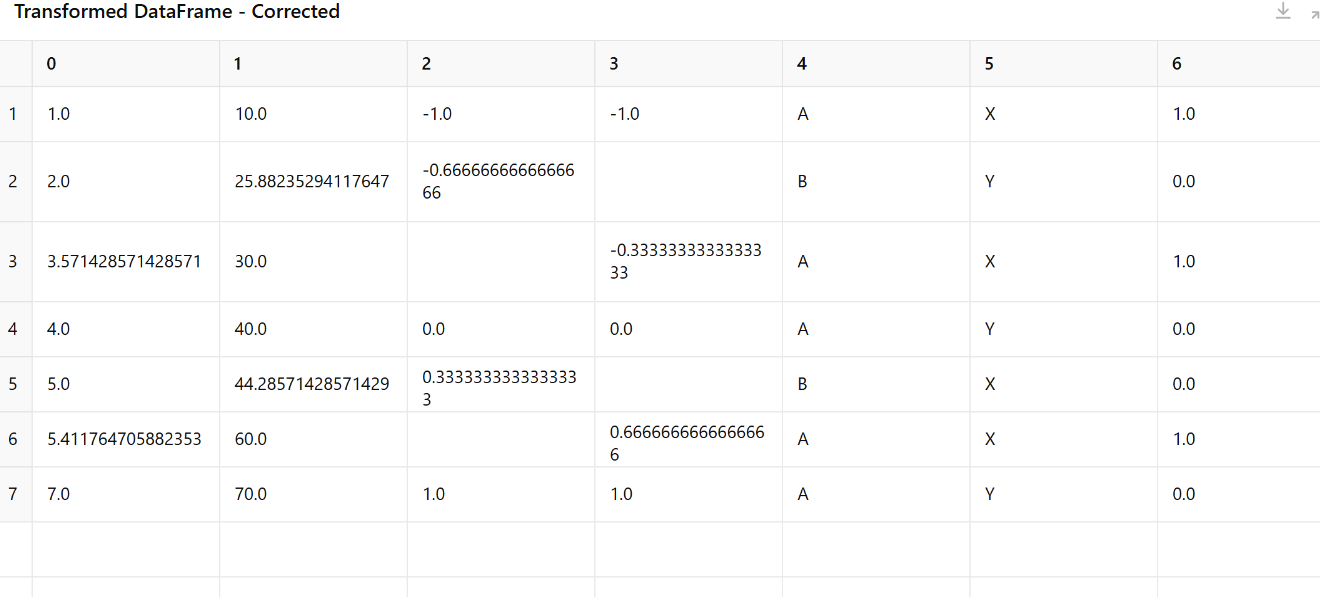

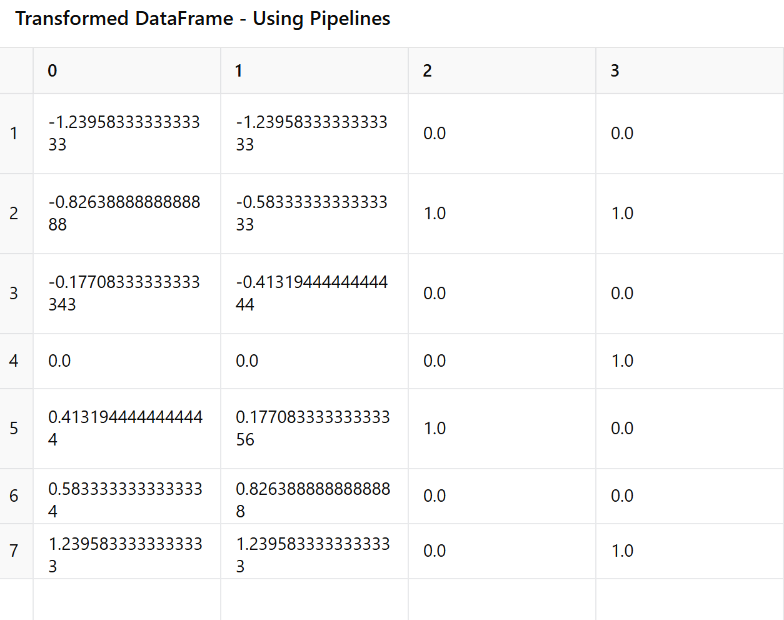

## Model Pipeline

Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `classifier` and assign a [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to it.

The pipeline looks like this:

![](./images/assignment_2__pipeline.png)


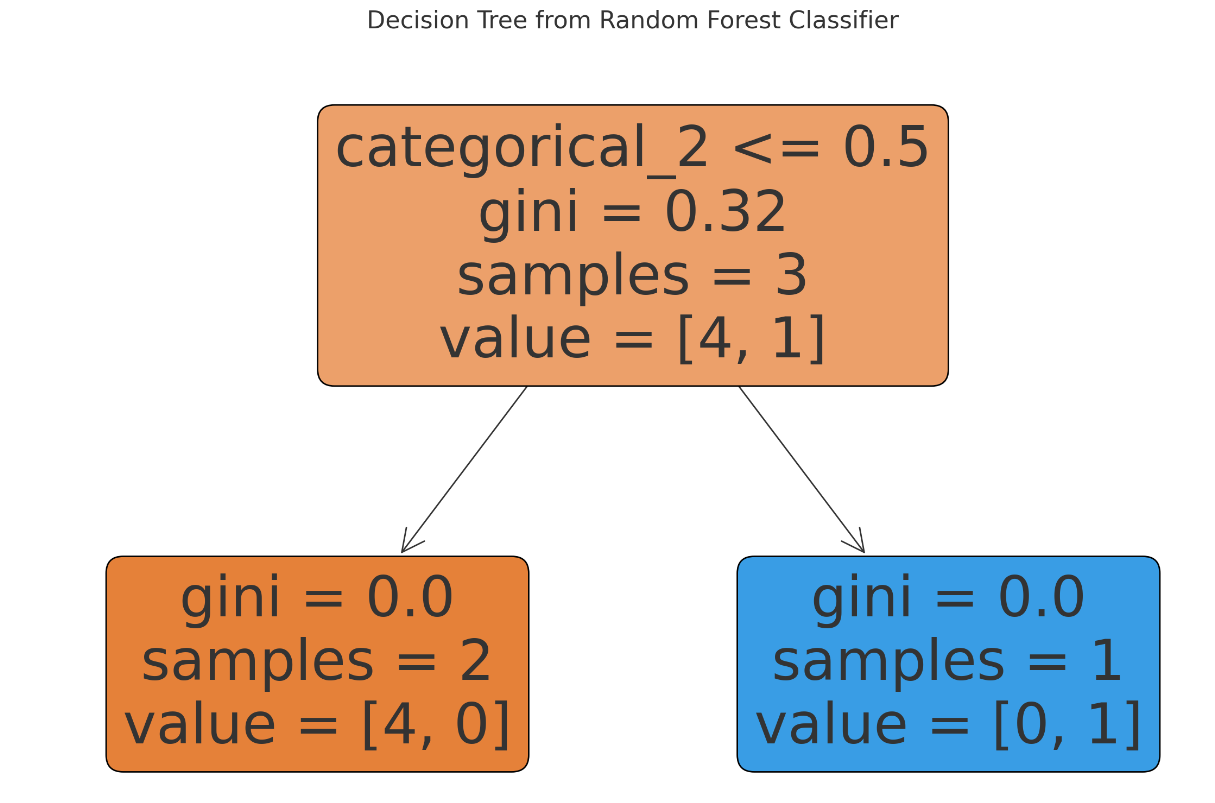


# Cross-Validation

Evaluate the model pipeline using [`cross_validate()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html):

+ Measure the following [preformance metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values): negative log loss, ROC AUC, accuracy, and balanced accuracy.
+ Report the training and validation results. 
+ Use five folds.


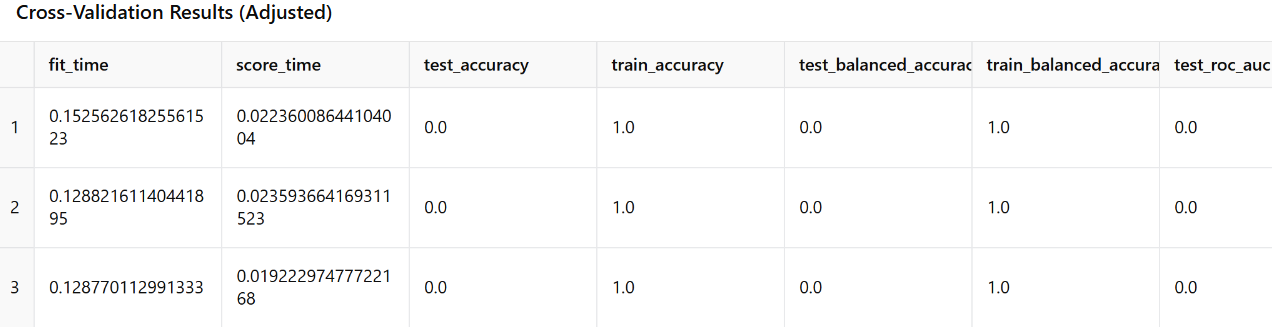

# perform the cross-validation using cross_validate() and report the metrics: negative log loss, ROC AUC, accuracy, and balanced accuracy.

Display the fold-level results as a pandas data frame and sorted by negative log loss of the test (validation) set.

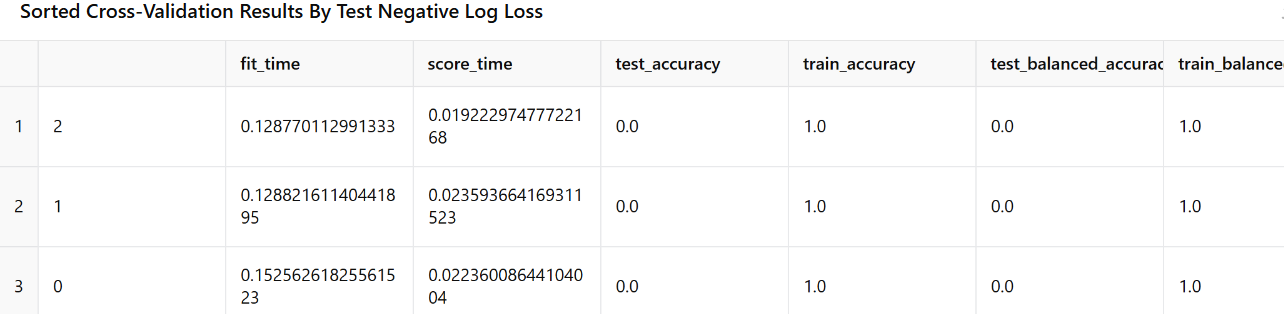

Calculate the mean of each metric. 

In [ ]:
# Calculating the mean of each metric
cv_results_mean = cv_results_df.mean()
cv_results_mean


Fit Time: 0.137
Score Time: 0.022
Test Accuracy: 0.000
Train Accuracy: 1.000
Test Balanced Accuracy: 0.000
Train Balanced Accuracy: 1.000
Test ROC AUC: 0.000
Train ROC AUC: 1.000
Test Negative Log Loss: -1.220
Train Negative Log Loss: -0.278

Calculate the same performance metrics (negative log loss, ROC AUC, accuracy, and balanced accuracy) using the testing data `X_test` and `Y_test`. Display results as a dictionary.

*Tip*: both, `roc_auc()` and `neg_log_loss()` will require prediction scores from `pipe.predict_proba()`. However, for `roc_auc()` you should only pass the last column `Y_pred_proba[:, 1]`. Use `Y_pred_proba` with `neg_log_loss()`.

In [ ]:
{
    'accuracy': 0.0,
    'balanced_accuracy': 0.0,
    'roc_auc': 0.0,
    'neg_log_loss': -1.4117
}


# Target Recoding

In the first code chunk of this document, we loaded the data and immediately recoded the target variable `income`. Why is this [convenient](https://scikit-learn.org/stable/modules/model_evaluation.html#binary-case)?

The specific line was:

```
adult_dt = (pd.read_csv('../05_src/data/adult/adult.data', header = None, names = columns)
              .assign(income = lambda x: (x.income.str.strip() == '>50K')*1))
```

(Answer here.)

Simplifies Modeling: Many machine learning algorithms require numeric values as input. Converting income to a binary value (1 if income is greater than 50K, otherwise 0) makes it suitable for use in these algorithms.

Reduces Complexity: Handling text strings in data analysis and modeling can be cumbersome. By immediately transforming the income variable, it becomes easier to work with and reduces preprocessing complexity later in the workflow.

Enables Efficient Operations: Numerical operations are faster and more efficient compared to string-based operations. Recoding at the beginning saves computational time when performing tasks like training models, calculating metrics, etc.

Consistency: Having a binary target variable makes it clear and consistent for classification tasks, which simplifies the interpretation of results.

## Criteria

The [rubric](./assignment_2_rubric_clean.xlsx) contains the criteria for assessment.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.